### 일원분산분석 개요

- 목적 : 셋 이상의 그룹 간 차이가 존재하는지를 확인하기 위한 가설 검정 방법
- 영가설 : 세그룹의 표본평균은 같다
- 대립가설 : 최소한 한 개 그룹에는 차이를 보인다


# 선행조건
   - 독립성: 모든 그룹은 서로 독립적이어야 한다.
   - 정규성 : 데이터는 정규분포를 따라야 함
       - 만약, 정규성을 띄지 않으면 비모수적인 방법인 부호검정 을 진행
    
   - 등분산성 : 두 그룹의 데이터에 대한 분산이 같아야 함
        - Levene의 등분산 검정 : p-value가 0.05 미만이면 분산이 다르다고 판단
        - 분산이 같은지 다른지에 따라 사용하는 통계량이 달라지므로, 비모수적인 방법을 수행해야 한다.


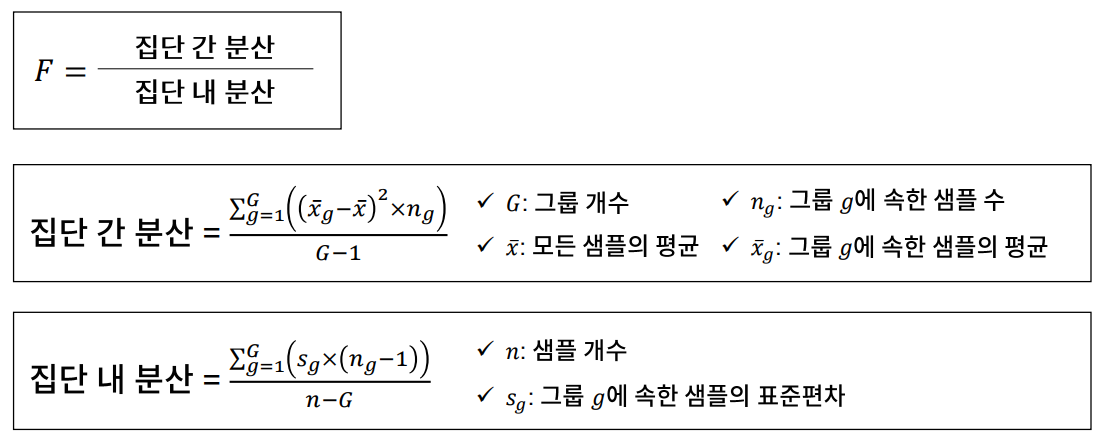

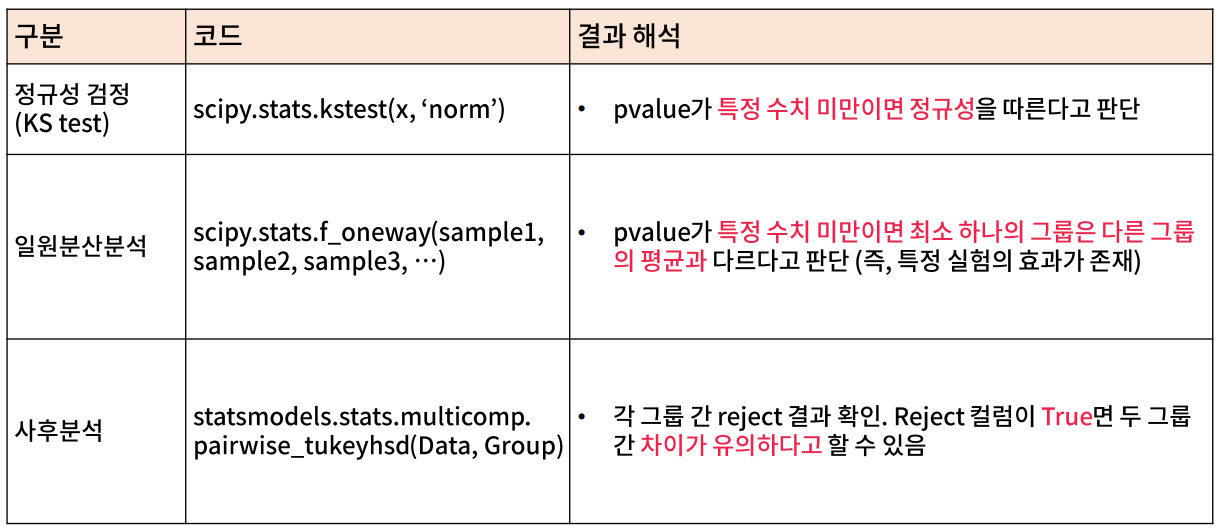

In [6]:
import numpy as np
import pandas as pd
from scipy.stats import *

%precision 3
np.random.seed(1111)


'%.3f'

In [7]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"


In [8]:
df = pd.read_csv("C:/Users\Administrator/Desktop/coding/python/muticam/jupyter note/data/지점별_일별판매량.csv",engine = "python",encoding='euc-kr'
)
df.head()
df

,일자,지점A,지점B,지점C
0,1,124,118,216
1,2,147,141,214
2,3,129,130,212
3,4,123,127,179
4,5,147,107,222


,일자,지점A,지점B,지점C
0,1,124,118,216
1,2,147,141,214
2,3,129,130,212
3,4,123,127,179
4,5,147,107,222
5,6,149,140,238
6,7,140,146,218
7,8,142,122,200
8,9,124,160,186
9,10,166,157,188


- 각 지점의 판매량의 평균 차이가 있는지 확인
- 변수가 2개를 초과(지점a.지점b,지점c)하므로 아노바분석(일원분산분석)

    -귀무가설:모든 그룹의 평균은 같다.
   
    -대립가설: 최소한 한개 그룹이라도 평균이 다르다.
    
    
    
##### 지점별 7월 판매량간의 유의미한 차이가 있는가?

- 정규성을모든집단에 대해 정규성검사해서 정규성이 없으면 다른분석
- 모든 집단에 대해 등분산확인 후 분산이 같지않으면 다른 분석


- ===>Kruskal-Wallis H Test를 수행해야 함(비모수적인방법)


In [13]:
# 데이터 분할(결측치 제거)

A= df["지점A"].dropna().values
B= df["지점B"].dropna().values
C= df["지점C"].dropna().values

In [14]:
print(type(A))

<class 'numpy.ndarray'>


{'whiskers': [<matplotlib.lines.Line2D at 0xa3accd0>,
 'caps': [<matplotlib.lines.Line2D at 0xa3c43d0>,
 'boxes': [<matplotlib.lines.Line2D at 0xa3ac970>,
 'medians': [<matplotlib.lines.Line2D at 0xa3c4a90>,
 'fliers': [<matplotlib.lines.Line2D at 0xa3c4df0>,
 'means': []}

([<matplotlib.axis.XTick at 0xa382250>,
 [Text(1, 0, '지점A'), Text(2, 0, '지점 B'), Text(3, 0, '지점 C')])

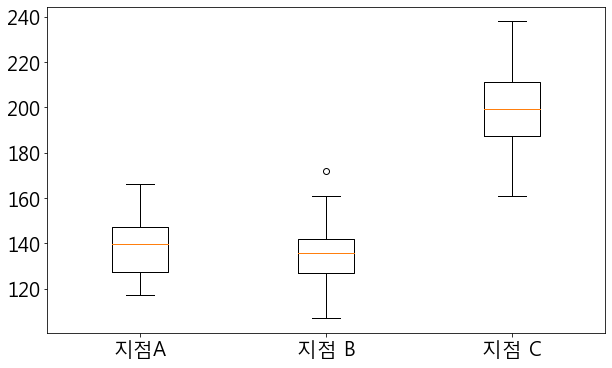

In [9]:
## 박스 플롯으로 시각화
%matplotlib inline
from matplotlib import pyplot as plt


from matplotlib import pyplot as plt
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (10, 6)


plt.boxplot([A,B,C])


plt.xticks([1,2,3],['지점A',"지점 B","지점 C"])
           
 

In [15]:
# 정규성 검정

kstest(A, 'norm')

kstest(B, 'norm')

kstest(C, 'norm')

# pvalue가 유의수준보다 작으므로 정규분포를 띈다.

KstestResult(statistic=1.0, pvalue=0.0)

KstestResult(statistic=1.0, pvalue=0.0)

KstestResult(statistic=1.0, pvalue=0.0)

In [11]:
# 등분산성 검정
levene(A,B,C)

# pvalue 가 0.05보다 크므로 귀무가설  채택(세그룹의 분산성 동일하다)

LeveneResult(statistic=1.244640322359082, pvalue=0.2931218868935245)

In [13]:
f_oneway(A,B,C)


# pvalue  가 거의 0에 수렴 > A,B,C 평균에서 최소 어느 한 집단은 유의한 차이가 존재



F_onewayResult(statistic=178.43825416847133, pvalue=1.6337420285664805e-31)

In [17]:
# 사후 분석(그룹별에 해당하는 갯수만큰 라벨및 값을 넘겨줘야함.)
A
B
C


array([124, 147, 129, 123, 147, 149, 140, 142, 124, 166, 127, 130, 139,
       121, 149, 155, 140, 150, 137, 144, 136, 126, 150, 142, 149, 127,
       140, 138, 128, 117], dtype=int64)

array([118, 141, 130, 127, 107, 140, 146, 122, 160, 157, 141, 142, 150,
       136, 157, 107, 172, 126, 135, 115, 133, 132, 127, 128, 142, 161,
       140, 125, 142, 135], dtype=int64)

array([216, 214, 212, 179, 222, 238, 218, 200, 186, 188, 216, 183, 198,
       199, 187, 183, 190, 161, 203, 192, 235, 208, 187, 201, 196, 202,
       209, 179, 197, 204], dtype=int64)

In [21]:

# 사후 분석
from statsmodels.stats.multicomp import pairwise_tukeyhsd

Data= A.tolist()+ B.tolist()+  C.tolist()

Data

Group = ["A"]*len(A)+ ["B"]*len(B)+ ["C"]*len(C)


Group


len(Data),len(Group)


posthoc= pairwise_tukeyhsd(Data,Group)


posthoc




[124,
 147,
 129,
 123,
 147,
 149,
 140,
 142,
 124,
 166,
 127,
 130,
 139,
 121,
 149,
 155,
 140,
 150,
 137,
 144,
 136,
 126,
 150,
 142,
 149,
 127,
 140,
 138,
 128,
 117,
 118,
 141,
 130,
 127,
 107,
 140,
 146,
 122,
 160,
 157,
 141,
 142,
 150,
 136,
 157,
 107,
 172,
 126,
 135,
 115,
 133,
 132,
 127,
 128,
 142,
 161,
 140,
 125,
 142,
 135,
 216,
 214,
 212,
 179,
 222,
 238,
 218,
 200,
 186,
 188,
 216,
 183,
 198,
 199,
 187,
 183,
 190,
 161,
 203,
 192,
 235,
 208,
 187,
 201,
 196,
 202,
 209,
 179,
 197,
 204]

['A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C']

(90, 90)

In [22]:
print(posthoc)  # 결과를 보려면 print() 사용해야 함


# reject 결과를 확인: 첫줄의  reject 가 False
# 첫줄은 [A,B]|[C]로 데이터가 구분됨
# 3변수에서 C는 다른 집단과 유의한 차이가 존재한다



Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     A      B     -1.4   0.9 -10.5745  7.7745  False
     A      C  62.2333 0.001  53.0589 71.4078   True
     B      C  63.6333 0.001  54.4589 72.8078   True
----------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


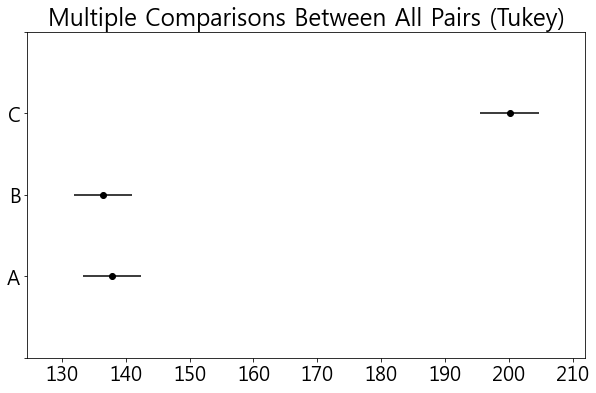

In [23]:
fig = posthoc.plot_simultaneous()
